# 图像分类示例程序
### 主要内容：   
> - 介绍图像分类中常用的特征及特征提取算法
> - 以一个实例介绍图像分类的思路
> - 介绍几种常用的图像分类工具

In [2]:
import numpy as np

> **NumPy**是一个主要用于处理n维数组对象的Python工具包，是Python提供数值计算的基础模块，在使用Python进行科学计算时NumPy必不可少，Python的许多扩展模块都是基于NumPy开发的，对NumPy的深入了解将有助于高效地使用Pandas和SciPy这样的工具库。
Python标准库里提供了array模块，array对象和列表不同，它直接保存数值，和C语言的一维数组比较类似。但是由于它不支持多维，也没有各种运算函数，因此不适合做数值运算。NumPy的诞生弥补了这些不足，NumPy提供了两种基本的对象：ndarray（N-dimensional array object）和ufunc（universal function object）
[关于numpy的详细介绍](https://www.jianshu.com/p/1d01bda02622 "简书")



In [3]:
import matplotlib.pyplot as plt

> **Matplotlib**是Python下著名的绘图库，它提供了一整套和Matlab相似的API，十分适合交互式绘图。它的官方网站上的文档相当完备，并且 Gallery页面[matplotlib.org/gallery.html](matplotlib.org/gallery.html)中有上百幅缩略图，打开之后都有源程序。因此如果需要绘制某种类型的图，只需要在这个页面中浏览、复制、粘贴一下，基本上都能满足日常需要。
为了方便快速绘图，Matplotlib通过pyplot模块提供了一套和Matlab类似的绘图API，将众多绘图对象所构成的复杂结构隐藏在这套API内部。只需要调用pyplot模块所提供的函数就可以实现快速绘图以及设置图表的各种细节。
[关于matplotlab的介绍](https://www.jianshu.com/p/0259b9b041c3 "简书")

In [4]:
from sklearn import svm, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

> **scikit-learn**是一个Python第三方提供的非常强力的机器学习库，它包含了从数据预处理到训练模型的各个方面。在实战使用scikit-learn中可以极大的节省我们编写代码的时间以及减少我们的代码量，使我们有更多的精力去分析数据分布，调整模型和修改超参数。sklearn拥有可以用于监督和无监督学习的方法，一般来说监督学习使用的更多。[关于scikit-learn的介绍](https://zhuanlan.zhihu.com/p/33420189 "知乎")


In [5]:
from sklearn.preprocessing import StandardScaler

> **导入预处理模块中的scale模块  将用于训练数据的标准化和归一化处理**    
>  在机器学习领域中，不同评价指标（即特征向量中的不同特征就是所述的不同评价指标）往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。其中，最典型的就是数据的归一化处理。[引用博客链接](https://blog.csdn.net/zenghaitao0128/article/details/78361038)，具体关于标准化和归一化请参考[特征工程中的「归一化」有什么作用？ - 知乎](https://www.zhihu.com/question/20455227)

In [6]:
import skimage as ski
import skimage.io as skio
import skimage.transform as sktransform
from skimage.filters import threshold_otsu, threshold_sauvola
from skimage.color import rgb2gray
from IPython.core.display import Image, display
from skimage import feature

---

### 1. 特征提取
> - 图像预处理
> - 特征提取(特征介绍)
> - 常用工具特征提取算法介绍

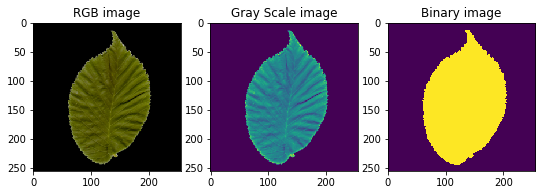

In [11]:
origin_image = skio.imread(r'D:\project\image_classification_demo\swedish-dataset-square-256\0\l1nr075.png')
origin_image = sktransform.rescale(origin_image, 1)
gray_image = rgb2gray(origin_image)
otsu_threshold = threshold_otsu(gray_image)
gray_image = ski.img_as_ubyte(gray_image)
bin_image = gray_image > otsu_threshold
plt.figure(figsize=(9,27))
plt.subplot(1,3,1),plt.imshow(origin_image),plt.title(r'RGB image')
plt.subplot(1,3,2),plt.imshow(gray_image),plt.title(r'Gray Scale image')
plt.subplot(1,3,3),plt.imshow(bin_image),plt.title(r'Binary image')
plt.show()

#### 1.1 GLCM  Texture Features 特征提取   
> 详细介绍请参照 [Scikit-image 官方文档](http://scikit-image.org/docs/0.12.x/_images/plot_glcm_1.png)   
![GLCM 特征示例](http://scikit-image.org/docs/0.12.x/_images/plot_glcm_1.png)

(256, 256, 1, 4)


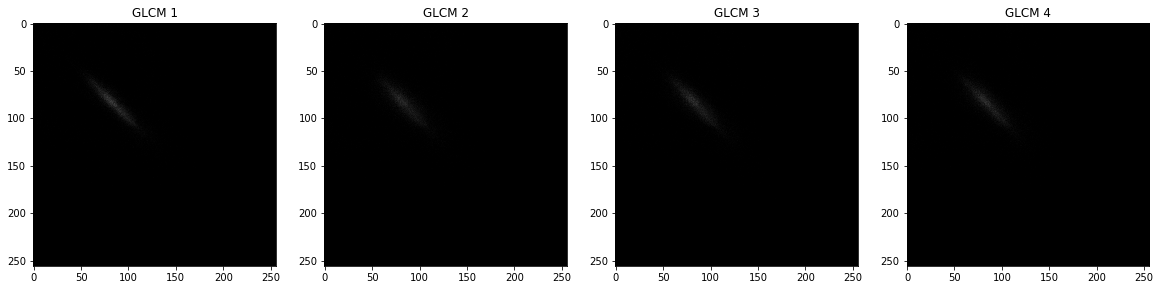

In [16]:
# 此处分别使用了水平、竖直、以及45 和135 度方向求 GLCM特征
feature_glcm = feature.greycomatrix(gray_image,[1],[0, np.pi/4, np.pi/2, 3*np.pi/4], levels= 256)
print(np.shape(feature_glcm))
plt.figure(figsize=(20,10))
plt.subplot(1,4,1),plt.imshow(feature_glcm[:,:,0,0],cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255), plt.title(r'GLCM 1')
plt.subplot(1,4,2),plt.imshow(feature_glcm[:,:,0,1],cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255), plt.title(r'GLCM 2')
plt.subplot(1,4,3),plt.imshow(feature_glcm[:,:,0,2],cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255), plt.title(r'GLCM 3')
plt.subplot(1,4,4),plt.imshow(feature_glcm[:,:,0,3],cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255), plt.title(r'GLCM 4')
plt.show()

#### 1.2  HOG (Histogram of Oriented Gradients ) 特征提取
> 关于HOG提取的详细内容请参考 [scikit-image官方文档](http://scikit-image.org/docs/0.12.x/auto_examples/features_detection/plot_hog.html#example-features-detection-plot-hog-py)
![HOG特征提取示例](http://scikit-image.org/docs/0.12.x/_images/plot_hog_1.png)

(20808,)
(256, 256)


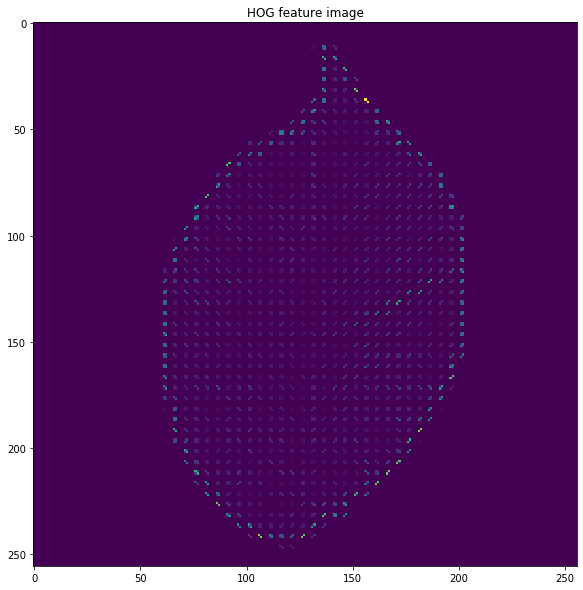

In [18]:
hog_feature_vector, hog_image = feature.hog(gray_image, orientations=8, pixels_per_cell=(5,5), cells_per_block=(1,1), visualize=True, block_norm='L2-Hys', feature_vector=True)
print(np.shape(hog_feature_vector))
print(np.shape(hog_image))
plt.figure(figsize=(10, 10))
plt.imshow(hog_image),plt.title(r'HOG feature image')
plt.show()

#### 1.3 LBP(Local Binary Pattern) 特征
> 局部二值特征详细介绍请参展 [scikit-image官方文档](http://scikit-image.org/docs/0.12.x/auto_examples/features_detection/plot_local_binary_pattern.html#example-features-detection-plot-local-binary-pattern-py)
![LBP特征原理示意图](http://scikit-image.org/docs/0.12.x/_images/plot_local_binary_pattern_1.png)

uint8
(256, 256)


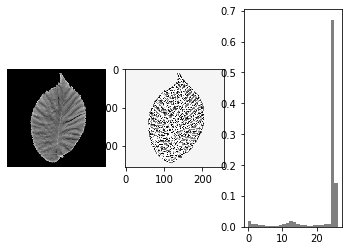

In [24]:
# 设置LBP 特征提取算法的参数
radius = 3
n_points = 8 * radius
print(gray_image.dtype)
feature_lbp = feature.local_binary_pattern(gray_image, n_points, radius, 'uniform')
print(np.shape(feature_lbp))
fig,(ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
plt.gray()
ax1.imshow(gray_image),ax1.axis('off')
ax2.imshow(feature_lbp),ax1.axis('off')
n_bins = int(feature_lbp.max() + 1)
ax3.hist(feature_lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins), facecolor='0.5')
plt.show()

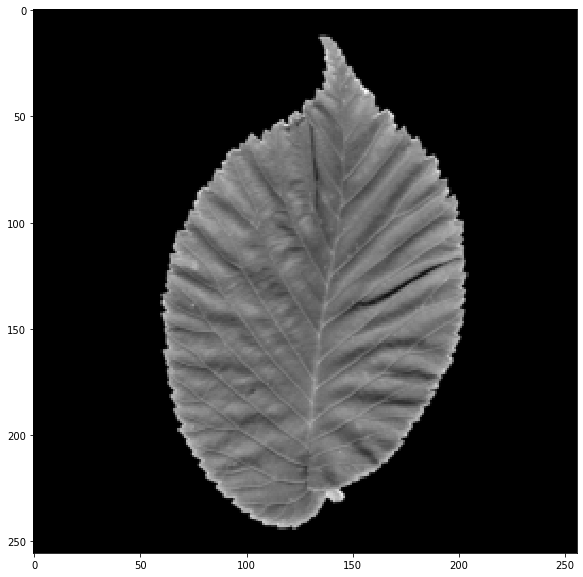

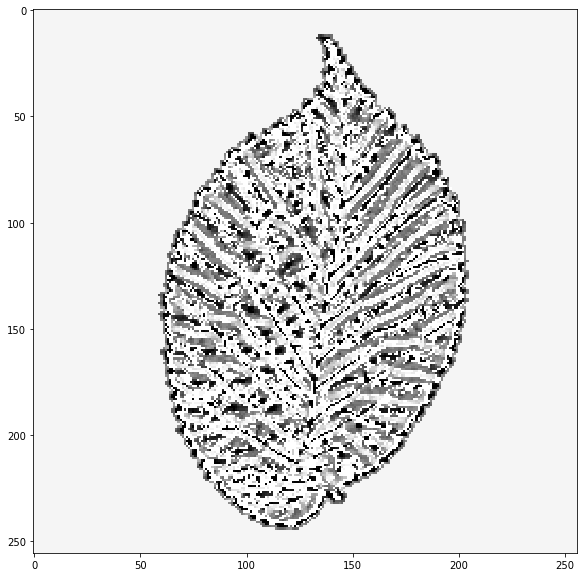

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(gray_image)
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(feature_lbp)
plt.show()

### 2.特征向量构造
> - 数据降维
> - 数据归一化、标准化

> *可以看到下面的代码将不同的特征压平到一行之后  每个向量的维度都不同，因此需要使用降维算法将其降到同样的维度*

In [31]:
feature_glcm_flattened = feature_glcm.flatten()
feature_lbp_flattended = feature_lbp.flatten()
print(np.shape(feature_glcm_flattened))
print(np.shape(hog_feature_vector))
print(np.shape(feature_lbp_flattended))

(262144,)
(20808,)
(65536,)
